In [1]:
from speech_pause_indicator import speech, pause ; import setup; from setup import make_samples, play_samples, get_word_xy, plot_word, plot_alignment, plt, np, alignment_err

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
##https://pyts.readthedocs.io/en/stable/auto_examples/metrics/plot_dtw.html
from pyts.datasets import load_gunpoint
from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (cost_matrix, accumulated_cost_matrix,
                              _return_path, _blurred_path_region)

In [3]:
file1, seg1_1, seg1_2 = "torgo-healthy.wav", 2, 3.7
file2, seg2_1, seg2_2 = "torgo-patient.wav", 2.5, 4.7

x, y, samplerate = setup.make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2)
n_timestamps_1, n_timestamps_2 = x.size, y.size

In [34]:
# Dynamic Time Warping: classic
method = "classic"

dtw_classic, path_classic = dtw(x, y, dist='square', method='classic', return_path=True)
path = path_classic
dist = dtw_classic

Avg err: 7646.250000000002


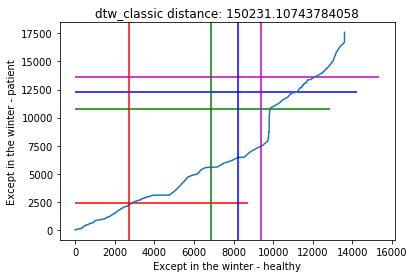

In [35]:
xlabel = "Except in the winter - healthy" ;  ylabel = "Except in the winter - patient"

time1_lst = [2.34, 2.86, 3.03, 3.17] ; time2_lst = [2.8, 3.85, 4.03, 4.20]
plt.title('dtw' + '_' + method + ' distance: ' + str(dist));

plt.plot(path[0], path[1]);
alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel)

In [70]:
# Dynamic Time Warping: itakura

method = 'itakura'

slope = 1.2
dtw_itakura, path_itakura = dtw(
    x, y, dist='square', method='itakura',
    options={'max_slope': slope}, return_path=True
)
parallelogram = itakura_parallelogram(n_timestamps_1, n_timestamps_2,
                                      max_slope=slope)
matrix_itakura = np.zeros((n_timestamps_1 + 1, n_timestamps_2 + 1))
for i in range(n_timestamps_1):
    matrix_itakura[i, np.arange(*parallelogram[:, i])] = 0.5
matrix_itakura[tuple(path_itakura)] = 1.

path = path_itakura
dist = dtw_itakura

In [62]:
def alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel):
    colors = ['red', 'g', 'b', 'm', 'brown', '#d89743', 'grey', 'c', 'orange', 'g', 'b', 'm', 'red']
    err = 0
    for i in range(len(time1_lst)):
        x_axis = get_word_xy(file1, time1_lst[i], seg1_1, seg1_2)
        y_axis = get_word_xy(file2, time2_lst[i], seg2_1, seg2_2)
        
        plt.axvline(x_axis, color = colors[i])
        plt.hlines(y_axis, 0, x_axis+6000, color = colors[i])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        warp_x = path[1][np.where(np.abs(path[1] - y_axis) < 0.1)][0]
        warp_y = path[0][np.where(np.abs(path[0] - x_axis) < 0.1)][0]     
    
#         print(warp_x, warp_y)
        print(x_axis, warp_x)
        print(y_axis, warp_y)
        e = np.abs(warp_x - x_axis) + np.abs(warp_y - y_axis)
        err = err + e
    print('Avg err: ' + str(err/len(time1_lst)))

In [71]:
print(len(path[0]))
print(len(path[1]))

24859
24859


In [98]:
def alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel):
    colors = ['red', 'g', 'b', 'm', 'brown', '#d89743', 'grey', 'c', 'orange', 'g', 'b', 'm', 'red']
    err = 0
    for i in range(len(time1_lst)):
        x_axis = get_word_xy(file1, time1_lst[i], seg1_1, seg1_2)
        y_axis = get_word_xy(file2, time2_lst[i], seg2_1, seg2_2)
        
        plt.axvline(x_axis, color = colors[i])
        plt.hlines(y_axis, 0, x_axis+6000, color = colors[i])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        m = len(path[0])
        print(int(max(path[0]) * x_axis/m))
        warp_x = path[0][int(max(path[0]) * x_axis/m)]
        warp_y = path[1][int(max(path[1]) * y_axis/m)]
    
        print(warp_x, warp_y)

        e = np.abs(warp_x - x_axis) + np.abs(warp_y - y_axis)
        err = err + e
    print('Avg err: ' + str(err/len(time1_lst)))

1480
928 1167
3744
2241 5164
4484
2835 6115
5094
3251 6957
Avg err: 9395.499999999998


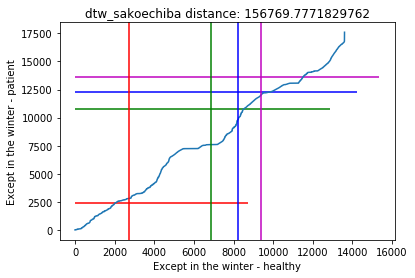

In [99]:
xlabel = "Except in the winter - healthy" ;  ylabel = "Except in the winter - patient"

time1_lst = [2.34, 2.86, 3.03, 3.17] ; time2_lst = [2.8, 3.85, 4.03, 4.20]
plt.title('dtw' + '_' + method + ' distance: ' + str(dist));

plt.plot(path[0], path[1]);
alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel)

In [85]:
method = "sakoechiba"

window_size = 0.1
dtw_sakoechiba, path_sakoechiba = dtw(
    x, y, dist='square', method='sakoechiba',
    options={'window_size': window_size}, return_path=True
)
band = sakoe_chiba_band(n_timestamps_1, n_timestamps_2,
                        window_size=window_size)
matrix_sakoechiba = np.zeros((n_timestamps_1 + 1, n_timestamps_2 + 1))
for i in range(n_timestamps_1):
    matrix_sakoechiba[i, np.arange(*band[:, i])] = 0.5
matrix_sakoechiba[tuple(path_sakoechiba)] = 1.

path = path_sakoechiba
dist = dtw_sakoechiba

2719.9999999999986 2400
2399.999999999998 2720
6879.999999999998 10800
10800.0 6880
8239.999999999998 12240
12240.000000000002 8240
9359.999999999998 13600
13600.0 9360
Avg err: 6240.000000000002


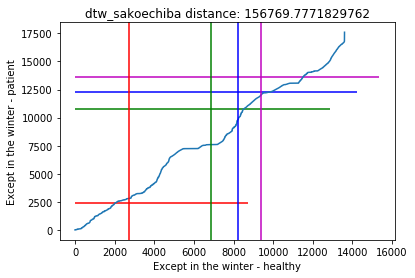

In [65]:
plt.title('dtw' + '_' + method + ' distance: ' + str(dist));
plt.plot(path[0], path[1]);
alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel)

In [45]:
method = "multiscale"

resolution, radius = 5, 2
dtw_multiscale, path_multiscale = dtw(
    x, y, dist='square', method='multiscale',
    options={'resolution': resolution, 'radius': radius}, return_path=True
)

x_padded = x.reshape(-1, resolution).mean(axis=1)
y_padded = y.reshape(-1, resolution).mean(axis=1)

cost_mat_res = cost_matrix(x_padded, y_padded, dist='square', region=None)
acc_cost_mat_res = accumulated_cost_matrix(cost_mat_res)
path_res = _return_path(acc_cost_mat_res)

multiscale_region = _blurred_path_region(
    n_timestamps_1, n_timestamps_2, resolution, x_padded.size, y_padded.size,
    path_res,
    radius=radius
)
matrix_multiscale = np.zeros((n_timestamps_1 + 1, n_timestamps_2 + 1))
for i in range(n_timestamps_1):
    matrix_multiscale[i, np.arange(*multiscale_region[:, i])] = 0.5
matrix_multiscale[tuple(path_multiscale)] = 1.

path = path_multiscale
dist = dtw_multiscale

Avg err: 2.6147972675971687e-12


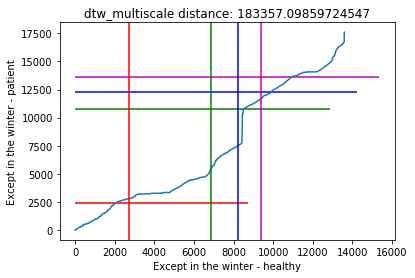

In [46]:
plt.title('dtw' + '_' + method + ' distance: ' + str(dist));
plt.plot(path[0], path[1]);
alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel)

In [42]:
# another set of files

file1, seg1_1, seg1_2 = "torgo-healthy.wav", 3.7, 6.50
file2, seg2_1, seg2_2 = "torgo-patient.wav", 4.75, 11.38
x, y, samplerate = setup.make_samples(file1, seg1_1, seg1_2, file2, seg2_1, seg2_2)
n_timestamps_1, n_timestamps_2 = x.size, y.size

In [43]:
# Dynamic Time Warping: classic
method = "classic"

dtw_classic, path_classic = dtw(x, y, dist='square', method='classic', return_path=True)
path = path_classic
dist = dtw_classic

Avg err: 32649.625


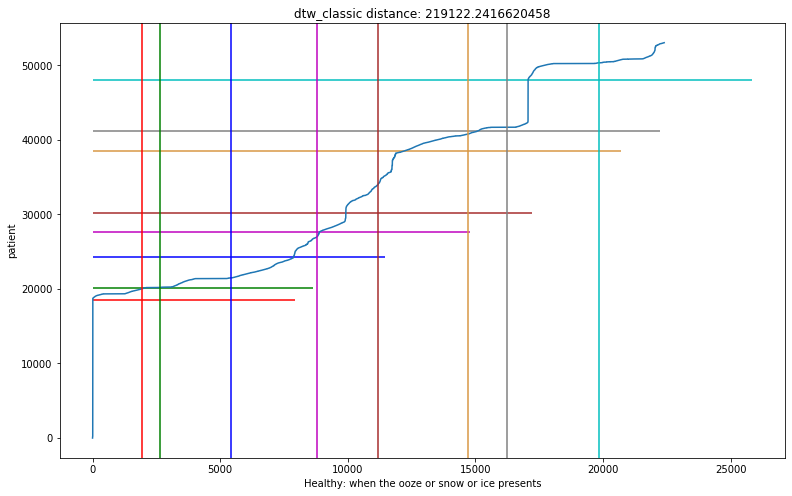

In [44]:
xlabel = "Healthy: when the ooze or snow or ice presents" ;  ylabel = "patient"
plt.figure(figsize=(13, 8))
time1_lst = [3.94, 4.03, 4.38, 4.8, 5.1, 5.54, 5.73, 6.18] ;time2_lst = [7.07, 7.26, 7.78, 8.21, 8.53, 9.57, 9.9, 10.76]
plt.title('dtw' + '_' + method + ' distance: ' + str(dist));

plt.plot(path[0], path[1]);
alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel)

In [46]:
# Dynamic Time Warping: itakura

method = 'itakura'

slope = 1.2
dtw_itakura, path_itakura = dtw(
    x, y, dist='square', method='itakura',
    options={'max_slope': slope}, return_path=True
)
parallelogram = itakura_parallelogram(n_timestamps_1, n_timestamps_2,
                                      max_slope=slope)
matrix_itakura = np.zeros((n_timestamps_1 + 1, n_timestamps_2 + 1))
for i in range(n_timestamps_1):
    matrix_itakura[i, np.arange(*parallelogram[:, i])] = 0.5
matrix_itakura[tuple(path_itakura)] = 1.

path = path_itakura
dist = dtw_itakura

Avg err: 25726.25


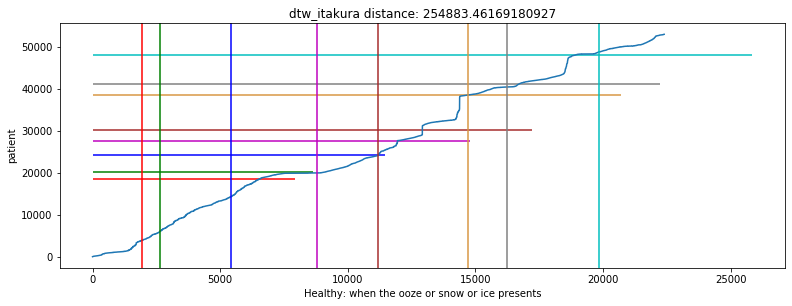

In [64]:
plt.figure(figsize=(13, 4.5)) ; plt.title('dtw' + '_' + method + ' distance: ' + str(dist));
plt.plot(path[0], path[1]);
alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel);

In [65]:
method = "sakoechiba"

window_size = 0.1
dtw_sakoechiba, path_sakoechiba = dtw(
    x, y, dist='square', method='sakoechiba',
    options={'window_size': window_size}, return_path=True
)
band = sakoe_chiba_band(n_timestamps_1, n_timestamps_2,
                        window_size=window_size)
matrix_sakoechiba = np.zeros((n_timestamps_1 + 1, n_timestamps_2 + 1))
for i in range(n_timestamps_1):
    matrix_sakoechiba[i, np.arange(*band[:, i])] = 0.5
matrix_sakoechiba[tuple(path_sakoechiba)] = 1.

path = path_sakoechiba
dist = dtw_sakoechiba

Avg err: 25739.125


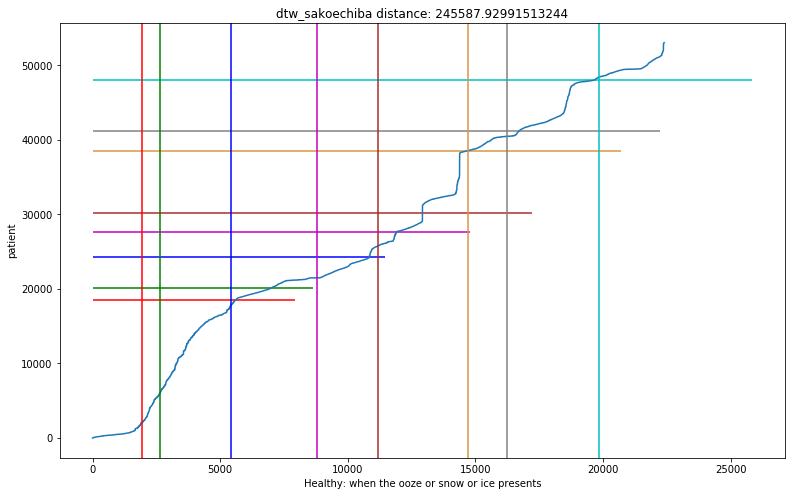

In [66]:
plt.figure(figsize=(13, 8)) ; plt.title('dtw' + '_' + method + ' distance: ' + str(dist));
plt.plot(path[0], path[1]);
alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel)

In [67]:
method = "multiscale"

resolution, radius = 5, 2
dtw_multiscale, path_multiscale = dtw(
    x, y, dist='square', method='multiscale',
    options={'resolution': resolution, 'radius': radius}, return_path=True
)

x_padded = x.reshape(-1, resolution).mean(axis=1)
y_padded = y.reshape(-1, resolution).mean(axis=1)

cost_mat_res = cost_matrix(x_padded, y_padded, dist='square', region=None)
acc_cost_mat_res = accumulated_cost_matrix(cost_mat_res)
path_res = _return_path(acc_cost_mat_res)

multiscale_region = _blurred_path_region(
    n_timestamps_1, n_timestamps_2, resolution, x_padded.size, y_padded.size,
    path_res,
    radius=radius
)
matrix_multiscale = np.zeros((n_timestamps_1 + 1, n_timestamps_2 + 1))
for i in range(n_timestamps_1):
    matrix_multiscale[i, np.arange(*multiscale_region[:, i])] = 0.5
matrix_multiscale[tuple(path_multiscale)] = 1.

path = path_multiscale
dist = dtw_multiscale

Avg err: 33337.75


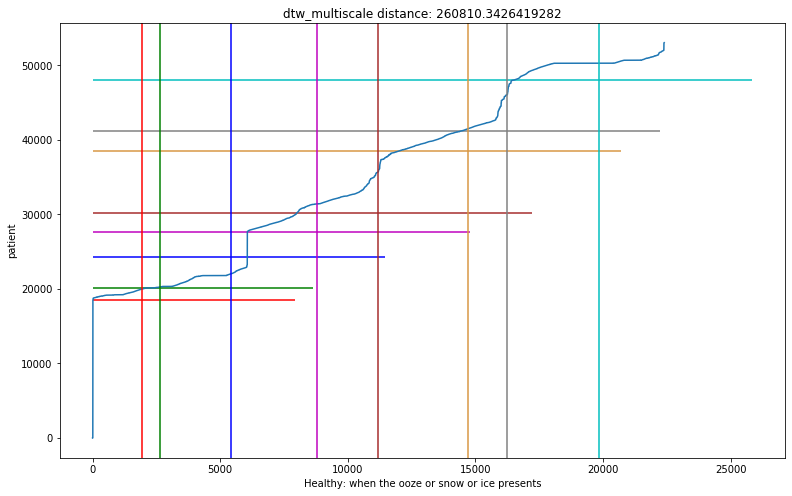

In [68]:
plt.figure(figsize=(13, 8)) ; plt.title('dtw' + '_' + method + ' distance: ' + str(dist));
plt.plot(path[0], path[1]);
alignment_err(path, file1, file2, seg1_1, seg1_2, seg2_1, seg2_2, time1_lst, time2_lst, xlabel, ylabel)